In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
%matplotlib inline
import numpy as np
from sklearn import datasets

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(iris.target))

('Class labels:', array([0, 1, 2]))


In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

In [4]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
#sc.fit(X_train) 
#X_train_std = sc.transform(X_train) 
#X_test_std = sc.transform(X_test) 
##################################### Line below its a little more optimized

In [5]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)  

In [6]:
from sklearn.linear_model import Perceptron 
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1) 
ppn.fit(X_train_std, y_train) 

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [7]:
y_pred = ppn.predict(X_test_std) 
print('Misclassified samples: %d' % (y_test != y_pred).sum()) 

Misclassified samples: 3


In [8]:
from sklearn.metrics import accuracy_score 
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred)) 

Accuracy: 0.93


In [9]:
!pip install mlxtend ## Adding mlxtend Package to Python

    100% |████████████████████████████████| 1.3MB 469kB/s ta 0:00:011


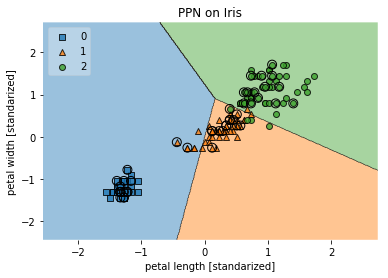

In [10]:
from mlxtend.plotting import plot_decision_regions
X_combined_std = np.vstack((X_train_std, X_test_std)) 
y_combined = np.hstack((y_train, y_test)) 

plot_decision_regions(X_combined_std, y_combined, clf=ppn, legend=2,X_highlight=X_combined_std[105:150])
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.title('PPN on Iris')
plt.show()

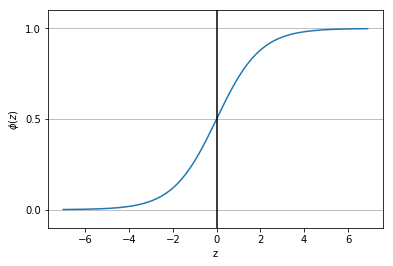

In [11]:
import numpy as np
def sigmoid(z): 
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
#z
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1) 
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

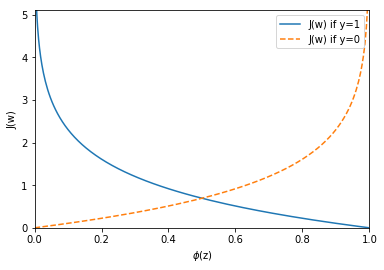

In [12]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z] 
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show() 

## Logistic Regression Model with scikit-learn

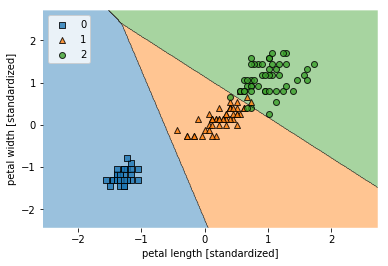

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, clf=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [14]:
lr.score(X_combined_std, y_combined)

0.96

In [15]:
lr.predict_proba(X_test_std[:3, :])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [16]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

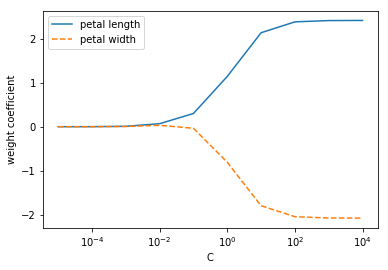

In [17]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## Linear "SVM" Model (Support Vector Machine)

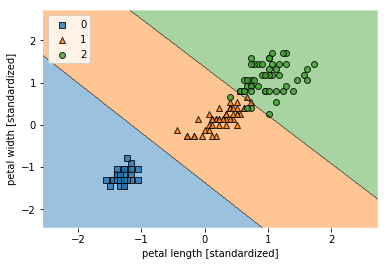

In [18]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, clf=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [19]:
svm.score(X_combined_std, y_combined)

0.96

## Kernel methods for linearly inseparable data

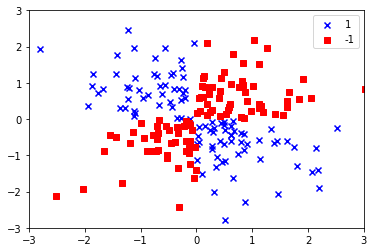

array([[ 1.62434536e+00, -6.11756414e-01],
       [-5.28171752e-01, -1.07296862e+00],
       [ 8.65407629e-01, -2.30153870e+00],
       [ 1.74481176e+00, -7.61206901e-01],
       [ 3.19039096e-01, -2.49370375e-01],
       [ 1.46210794e+00, -2.06014071e+00],
       [-3.22417204e-01, -3.84054355e-01],
       [ 1.13376944e+00, -1.09989127e+00],
       [-1.72428208e-01, -8.77858418e-01],
       [ 4.22137467e-02,  5.82815214e-01],
       [-1.10061918e+00,  1.14472371e+00],
       [ 9.01590721e-01,  5.02494339e-01],
       [ 9.00855949e-01, -6.83727859e-01],
       [-1.22890226e-01, -9.35769434e-01],
       [-2.67888080e-01,  5.30355467e-01],
       [-6.91660752e-01, -3.96753527e-01],
       [-6.87172700e-01, -8.45205641e-01],
       [-6.71246131e-01, -1.26645989e-02],
       [-1.11731035e+00,  2.34415698e-01],
       [ 1.65980218e+00,  7.42044161e-01],
       [-1.91835552e-01, -8.87628964e-01],
       [-7.47158294e-01,  1.69245460e+00],
       [ 5.08077548e-02, -6.36995647e-01],
       [ 1.

In [47]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1],c='b', marker='x',label='1')
plt.scatter(X_xor[y_xor == -1, 0],X_xor[y_xor == -1, 1],c='r',marker='s',label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

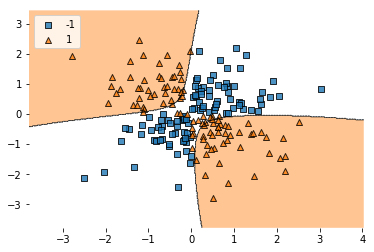

In [21]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, clf=svm)
plt.legend(loc='upper left')
plt.show()

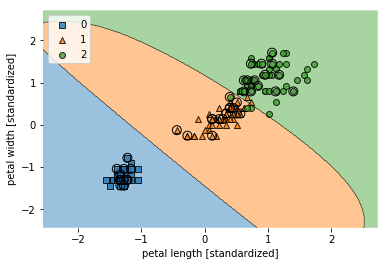

In [22]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
#X_test, y_test = X_train_std.arange(105,150), y_train_std.arange(105,150)
plot_decision_regions(X_combined_std,y_combined, clf=svm,X_highlight=X_combined_std[105:150])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Decision Tree

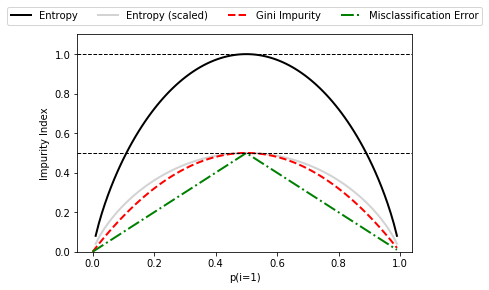

In [23]:
#import matplotlib.pyplot as plt
#import numpy as np
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],['Entropy', 'Entropy (scaled)','Gini Impurity','Misclassification Error'],['-', '-', '--', '-.'],['black', 'lightgray','red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

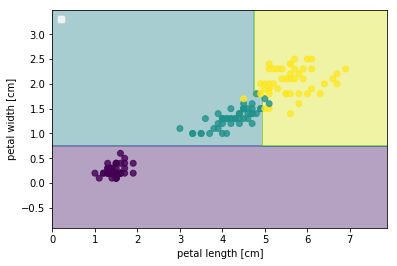

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

##------------------------------------------------------------------------------------------------------
##------------------------------------------------------------------------------------------------------
## plot_decision_regions2 needed because mlexnt doesnt provide support for decision tree classifier
def plot_decision_regions2(X, y, clf, res=0.02):
    """
    Plots decision regions of a classifier.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
      Feature Matrix.
      
    y : array-like, shape = [n_samples]
      True class labels.
    
    clf : Classifier object. Must have a .predict method.
        
    res : float (default: 0.02)
      Grid width. Lower values increase the resolution but
        slow down the plotting.
        
    Returns
    ---------
    None

    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, res),
                         np.arange(y_min, y_max, res))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.8)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
##------------------------------------------------------------------------------------------------------
##------------------------------------------------------------------------------------------------------
##------------------------------------------------------------------------------------------------------


plot_decision_regions2(X_combined,y_combined,clf=tree)
#plot_decision_regions(X_combined_std,y_combined, clf=tree,X_highlight=X_combined_std[105:150])
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [38]:
#!pip install graphviz  ## Required sometimes before pydotplus
#!pip install pyparsing ## Required sometimes before pydotplus
!pip install pydotplus

    100% |████████████████████████████████| 286kB 1.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [40]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree,filled=True,rounded=True,class_names=['Setosa','Versicolor','Virginica'],feature_names=['petal length','petal width'],out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

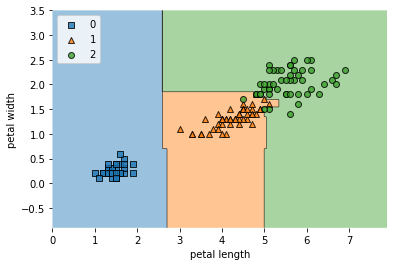

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1,n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,clf=forest)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## KNN Model

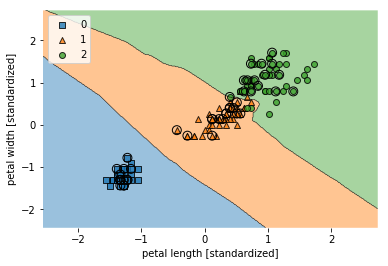

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,clf=knn, X_highlight=X_combined_std[105:150])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## In this chapter, you learned about many different machine learning algorithms that are used to tackle linear and nonlinear problems. We have seen that decision trees are particularly attractive if we care about interpretability. Logistic regression is not only a useful model for online learning via stochastic gradient descent, but also allows us to predict the probability of a particular event. Although support vector machines are powerful linear models that can be extended to nonlinear problems via the kernel trick, they have many parameters that have to be tuned in order to make good predictions. In contrast, ensemble methods such as random forests don't require much parameter tuning and don't overfit as easily as decision trees, which makes them attractive models for many practical problem domains. The KNN classifier offers an alternative approach to classification via lazy learning that allows us to make predictions without any model training, but with a more computationally expensive prediction step. 
## However, even more important than the choice of an appropriate learning algorithm is the available data in our training dataset. No algorithm will be able to make good predictions without informative and discriminatory features.

# Parametric versus nonparametric models
## Machine learning algorithms can be grouped into parametric and nonparametric models. Using parametric models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. Typical examples of parametric models are the perceptron, logistic regression, and the linear SVM. In contrast, nonparametric models can't be characterized by a fixed set of parameters, and the number of parameters grows with the training data. Two examples of non-parametric models that we have seen so far are the decision tree classifier/random forest and the kernel SVM. KNN belongs to a subcategory of nonparametric models that is described as instance-based learning. Models based on instance-based learning are characterized by memorizing the training dataset, and lazy learning is a special case of instance-based learning that is associated with no (zero) cost during the learning process.